In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.exposure import rescale_intensity
%matplotlib inline 

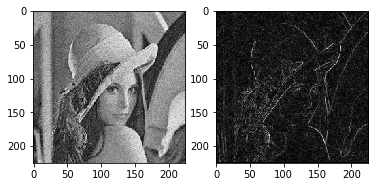

/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [16]:
img = cv2.imread("input/noisylenna.jpeg",0)
#img = imresize(image, (1024,1024))
##Roberts operator
size = img.shape
r=np.zeros((size[0],size[1]),dtype=np.integer)

for i in range (size[0]):
    for j in range (size[1]):
        r[i,j]=img[i][j]
gx = np.zeros ((size [0], size [1]), dtype = np.integer)
gy=np.zeros((size[0],size[1]),dtype=np.integer)
g=np.zeros((size[0],size[1]),dtype=np.float)
for i in range (size[0]-1):
    for j in range (size[1]-1):
        gx[i,j]=r[i,j]-r[i+1,j+1]
        gy[i,j]=r[i,j+1]-r[i+1,j]
g=np.sqrt(np.power(gx,2)+np.power(gy,2))


plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(g, cmap='gray')
plt.show()

import scipy.misc
scipy.misc.imsave('output/noisylenna1.png', g)


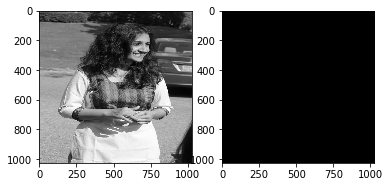

In [31]:
#Sobel operator
image = cv2.imread("../../Desktop/fbdp.jpg",0)
img = imresize(image, (1026,1026))
##Roberts operator
size = img.shape
r=np.zeros((size[0],size[1]),dtype=np.integer)

for i in range (size[0]):
    for j in range (size[1]):
        r[i,j]=img[i][j]
gx = np.zeros ((size [0], size [1]), dtype = np.integer)
gy=np.zeros((size[0],size[1]),dtype=np.integer)
g=np.zeros((size[0],size[1]),dtype=np.float)

for i in range (size[0]-1):
    for j in range (size[1]-1):
        if j+1 > size[1] or i+1 < size[0]:
            break
        else:
            gx[i,j] = (r[i][j]) + (r[i + 1][j] * 2) + (r[i+2][j]) - (r[i][j+2]) - (2 * r[i+1][j+2]) - (r[i+2][j+2])
      

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(gx, cmap='gray')
plt.show()
        





#g=np.sqrt(np.power(gx,2)+np.power(gy,2))


In [17]:
image = cv2.imread("../../Desktop/shapes.jpeg",0)
def convolve(image, kernel):
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) / 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
        cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # perform the actual convolution by taking the
            # element-wise multiplicate between the ROI and
            # the kernel, then summing the matrix
            k = (roi * kernel).sum()

            # store the convolved value in the output (x,y)-
            # coordinate of the output image
            output[y - pad, x - pad] = k
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    # return the output image
    return output

In [18]:
prewitt1 = np.array((
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]), dtype="int")

prewitt2 = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]), dtype="int")

laplacian1 = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

laplacian2 = np.array((
    [1, 0, 1],
    [0, -4, 0],
    [1, 0, 1]), dtype="int")

sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
 
# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

kirsch1 = np.array((
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]), dtype="int")

kirsch2 = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]), dtype="int")

kirsch3 = np.array((
    [0, 1, 1],
    [-1, 0, 1],
    [-1, -1, 0]), dtype="int")

kirsch4 = np.array((
    [1, 1, 0],
    [1, 0, -1],
    [0, -1, -1]), dtype="int")

convoleOutput1 = convolve(image, sobelX)
convoleOutput2 = convolve(image, sobelY)

laplace1 = convolve(image,laplacian1)
laplace2 = convolve(image,laplacian2)

pw1 = convolve(image,prewitt1)
pw2 = convolve(image,prewitt2)

k1 = convolve(image,kirsch1)
k2 = convolve(image,kirsch2)
k3 = convolve(image,kirsch3)
k4 = convolve(image,kirsch4)

"""
s = convoleOutput1.shape
g=np.zeros((s[0],s[1]),dtype=np.float)
g=np.sqrt(np.power(convoleOutput1,2)+np.power(convoleOutput2,2)).astype("uint8")
g = rescale_intensity(g, in_range=(0, 255))
g = (g * 255).astype("uint8")
print(g.shape)
"""

'\ns = convoleOutput1.shape\ng=np.zeros((s[0],s[1]),dtype=np.float)\ng=np.sqrt(np.power(convoleOutput1,2)+np.power(convoleOutput2,2)).astype("uint8")\ng = rescale_intensity(g, in_range=(0, 255))\ng = (g * 255).astype("uint8")\nprint(g.shape)\n'

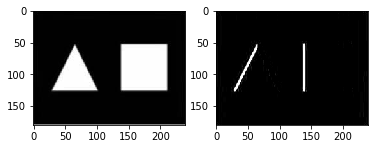

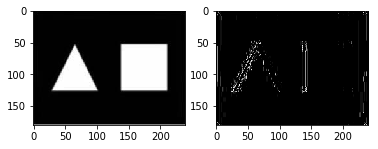

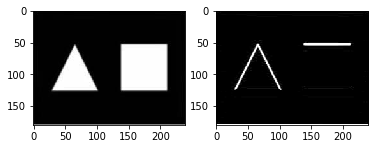

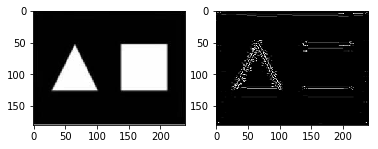

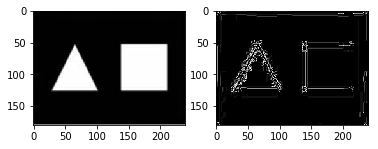

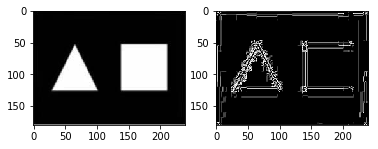

/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:39: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:40: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:42: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:43: DeprecationWarning: `imsave` is deprecated!
`i

In [20]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(convoleOutput1, cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.power(convoleOutput1,2), cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(convoleOutput2, cmap='gray')
plt.show()


plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.power(convoleOutput2,2), cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.power(convoleOutput1,2) +np.power(convoleOutput2,2) , cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.sqrt(np.power(convoleOutput1,2) +np.power(convoleOutput2,2)).astype("uint8") , cmap='gray')
plt.show()


scipy.misc.imsave('output/shapes2.png', convoleOutput1)
scipy.misc.imsave('output/shapes3.png', convoleOutput2)
scipy.misc.imsave('output/shapes4.png', np.power(convoleOutput1,2))
scipy.misc.imsave('output/shapes5.png', np.power(convoleOutput2,2))
scipy.misc.imsave('output/shapes6.png', np.power(convoleOutput1,2) +np.power(convoleOutput2,2))
scipy.misc.imsave('output/shapes7.png', np.sqrt(np.power(convoleOutput1,2) +np.power(convoleOutput2,2)))


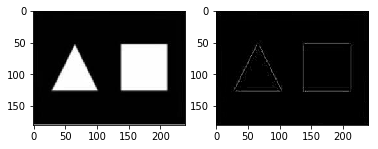

/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [21]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(laplace1, cmap='gray')
plt.show()

scipy.misc.imsave('output/shapes8.png', laplace1)


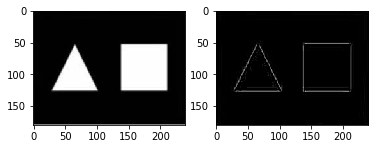

/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [22]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(laplace2, cmap='gray')
plt.show()

scipy.misc.imsave('output/shapes9.png', laplace2)

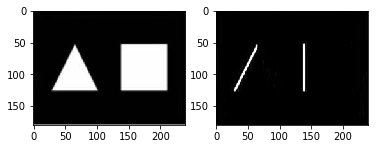

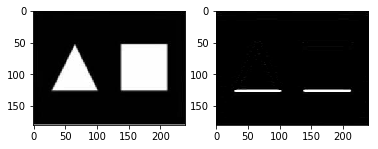

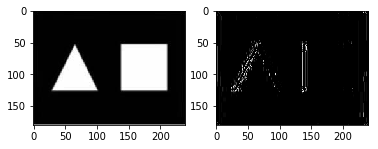

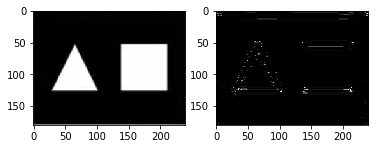

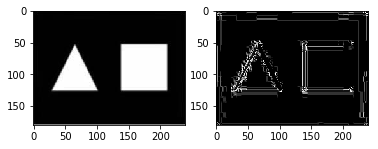

/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:31: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:34: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:35: DeprecationWarning: `imsave` is deprecated!
`i

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(pw1, cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(pw2, cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.power(pw1,2), cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.power(pw2,2), cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.sqrt(np.power(pw1,2) +np.power(pw2,2)).astype("uint8") , cmap='gray')
plt.show()

scipy.misc.imsave('output/shapes10.png', pw1)
scipy.misc.imsave('output/shapes11.png', pw2)
scipy.misc.imsave('output/shapes12.png', np.power(pw1,2))
scipy.misc.imsave('output/shapes13.png', np.power(pw2,2))
scipy.misc.imsave('output/shapes14.png', np.power(pw1,2) +np.power(pw2,2))
scipy.misc.imsave('output/shapes15.png', np.sqrt(np.power(pw1,2) +np.power(pw2,2)))



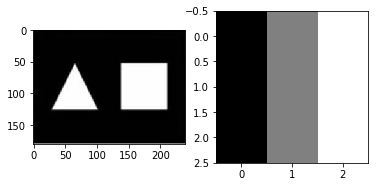

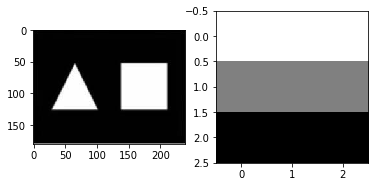

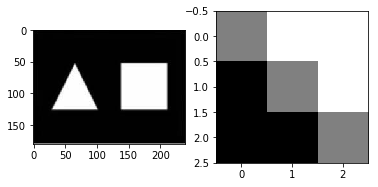

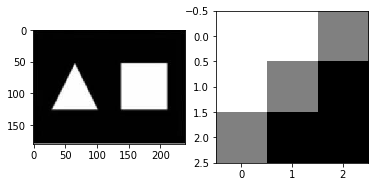

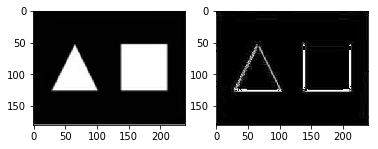

/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [27]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(kirsch1, cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(kirsch2, cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(kirsch3, cmap='gray')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(kirsch4, cmap='gray')
plt.show()

k = k1+k2+k3+k4

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(k, cmap='gray')
plt.show()

scipy.misc.imsave('output/shapes16.png', k)

In [29]:
image = cv2.imread("input/noisylenna.jpeg",0)

laplace11 = convolve(image,laplacian1)
laplace22 = convolve(image,laplacian2)

scipy.misc.imsave('output/shapes17.png', laplace11)
scipy.misc.imsave('output/shapes18.png', laplace22)

image = cv2.imread("input/lenna.png",0)

laplace111 = convolve(image,laplacian1)
laplace222 = convolve(image,laplacian2)
scipy.misc.imsave('output/shapes19.png', laplace111)
scipy.misc.imsave('output/shapes20.png', laplace222)


/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ankita/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
